# MULTI-CLASS CLASSIFICATION

## Learning Objectives:
After doing this Colab, you'll know how to do the following:

* Understand the classic MNIST problem.
* Create a deep neural network that performs multi-class classification.
* Tune the deep neural network.

This exercise introduces image classification with machine learning.

## The Dataset
  
This MNIST dataset contains a lot of examples:

* The MNIST training set contains 60,000 examples.
* The MNIST test set contains 10,000 examples.

Each example contains a pixel map showing how a person wrote a digit. For example, the following images shows how a person wrote the digit `1` and how that digit might be represented in a 14x14 pixel map (after the input data is normalized). 

![Two images. The first image shows a somewhat fuzzy digit one. The second image shows a 14x14 floating-point array in which most of the cells contain 0 but a few cells contain values between 0.0 and 1.0. The pattern of nonzero values corresponds to the image of the fuzzy digit in the first image.](https://www.tensorflow.org/images/MNIST-Matrix.png)

Each example in the MNIST dataset consists of:

* A label specified by a [rater](https://developers.google.com/machine-learning/glossary/#rater).  Each label must be an integer from 0 to 9.  For example, in the preceding image, the rater would almost certainly assign the label `1` to the example.
* A 28x28 pixel map, where each pixel is an integer between 0 and 255. The pixel values are on a gray scale in which 0 represents white, 255 represents black, and values between 0 and 255 represent various shades of gray.  

This is a multi-class classification problem with 10 output classes, one for each digit.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
from matplotlib import pyplot as plt 

pd.options.display.max_rows = 10
pd.options.display.float_format="{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

print("modulos importados con exito")

modulos importados con exito


Ahora importamos los datasets de imagenes que tensorflow.keras provides us el mnist y lo cargamos con .load_data()

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# the mnist csv training set is already shuffled
print("bases de datos cargadas con exito")

bases de datos cargadas con exito


### Viaualize the Data
The data in california Housing dataset was organized in columns. by contrast, the csv MNIST does not contain column names. Instead of column's names you use cardinal number to acces the differenet subsets of mnist dataset.

If you want to see one example you simply x_train[numero q sea] y si quieres verlo como imagen en vez de como una matriz (que es lo suyo si te quieres enterar de lo que ves) --> plt.imshow(x_train[numero que sea])





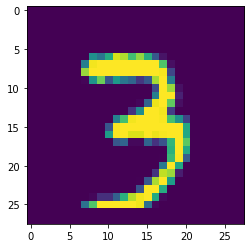

In [10]:
#cargamos la imagen 
plt.imshow(x_train[2917])

In [9]:
# Aqui cargamos el label que le corresponde para ver si es cierto
y_train[2917]

3

In [13]:
# Luego, a parte, tambien puedes mostrar filas de pixeles o pixeles unicos directamente, si eso te sirve para algo
x_train[2917][10]
#x_train[2917][10][13]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  58, 254, 216,  11,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [16]:
x_train[2917][10][17]

254

### Normalize the Data
Como sabes que cada pixel (un numero del array de los que esta compuesto cada imagen. cada numero = un pixel) esta entre 0 y 255 pues con dividir entre 255 se te queda normalizado (entre 0 y 1)

In [19]:
x_train_normalized = x_train/255
x_test_normalized = y_train/255
print(x_train_normalized[2917][10]) # Output a normalized row

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.22745098 0.99607843
 0.84705882 0.04313725 0.         0.         0.         0.         0.         0.         0.         0.        ]


### Define a Ploting Function

In [20]:
def plot_curve(epochs, hist, list_of_metrics):
    
    # list_of_metrics should be one of the names shown in:
    # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  
    
    plt.figure()
    plt.xlabel("Epochs")
    plt.yLabel("Value")
    
    for m in list_of_metrics:
        
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)
        
    plt.legend()
    
print("Loaded the plot_curve function.")

Loaded the plot_curve function.


### Create a Deep Neural Net Model

In [21]:
def create_model(learning_rate):
    
    model = tf.keras.models.Sequential()
    
    # The features stored are in two dimensional 28x28, so we have to flatten it to only one dimension 784 pasandolos a traves de este primer layer
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    
    # Ahora añade el primer layer que recoja todos los datos ya con la activation function relu
    model.add(tf.keras.layers.Dense(units=20, activation= 'relu'))
    
    # Añade un dropout para regularizar los valores que pasa al output, igual que usas este podria ser otro layer con L1 o L2
    model.add(tf.keras.layers.Dropout(rate=0.2))
    
    # AHora en el output usas the activation dunction 'softmax' para que de 10 different outputs cada uno con la probabilidad de
    # que el feature que entra por el input sea uno de los numeros del 0-9
    model.add(tf.keras.layers.Dense(units= 10, activation= 'softmax'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                 loss="sparse_categorical_crossentropy",
                 metrics=['accuracy'])
    
    return model

def train_model(model, df, epochs, batch_size, label_name):
    #seguir por aqui
    